In [1]:
import numpy as np
import numpy.testing as nt
import numpy.linalg as LA

import pandas as pd
import sqlite3

from matplotlib import pyplot as plt
from matplotlib import image as mpimg #for images

import skimage as sk
from skimage import io
from skimage import morphology
from skimage.util import invert
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from skimage.filters import threshold_mean
from skimage import measure
from skimage.color import rgb2gray 

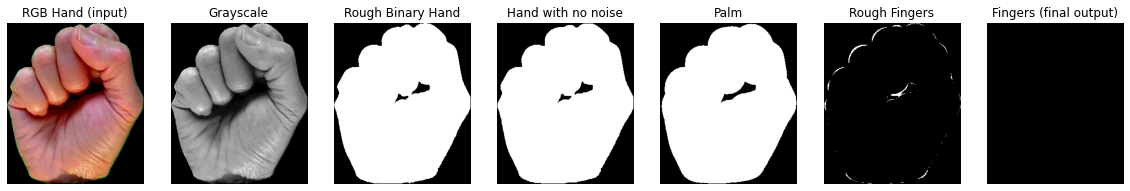

Name of image:  fingers/img (1).png
Number of Fingers:  0


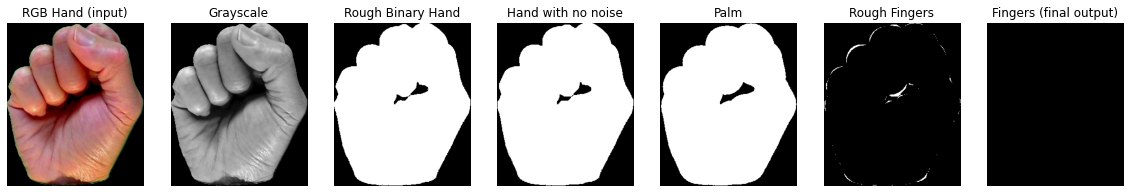

Name of image:  fingers/img (2).png
Number of Fingers:  0


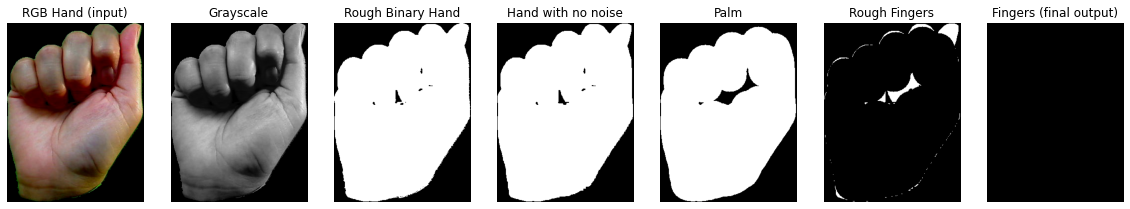

Name of image:  fingers/img (3).png
Number of Fingers:  0


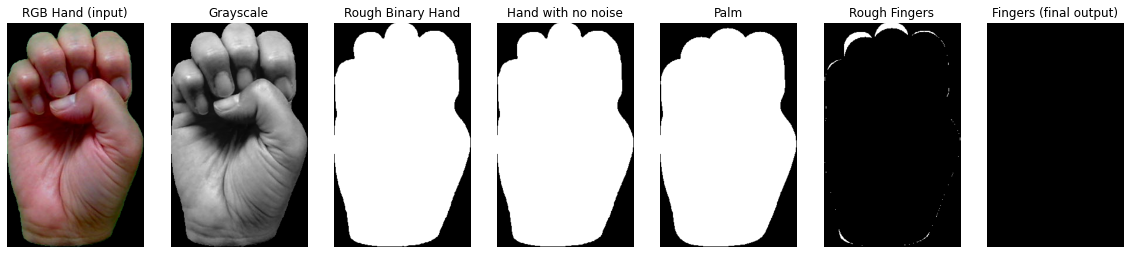

Name of image:  fingers/img (4).png
Number of Fingers:  0


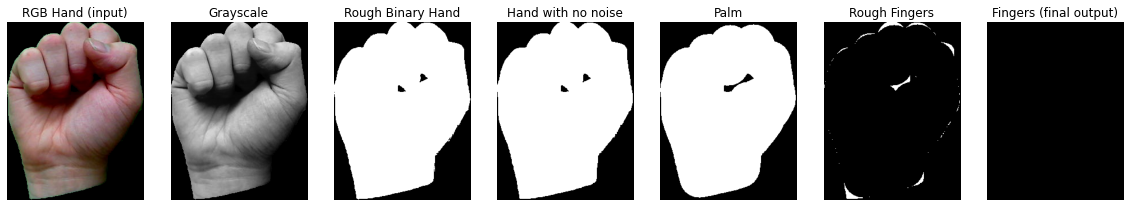

Name of image:  fingers/img (5).png
Number of Fingers:  0


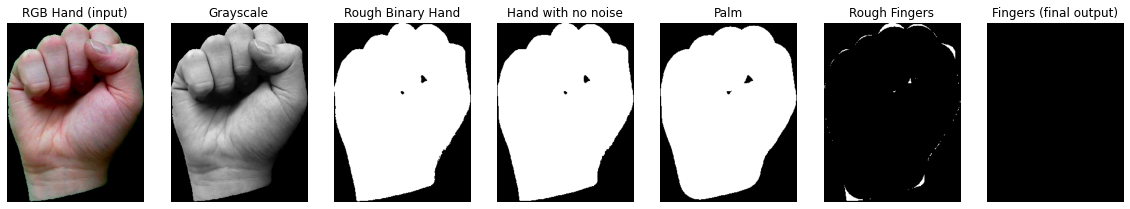

Name of image:  fingers/img (6).png
Number of Fingers:  0


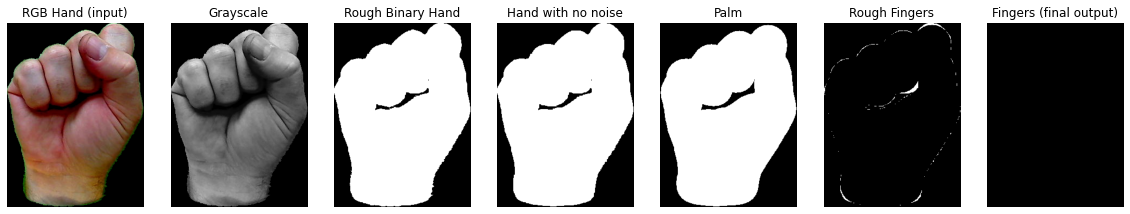

Name of image:  fingers/img (7).png
Number of Fingers:  0


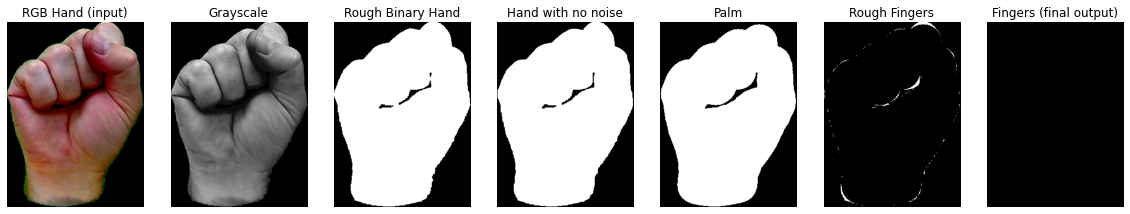

Name of image:  fingers/img (8).png
Number of Fingers:  0


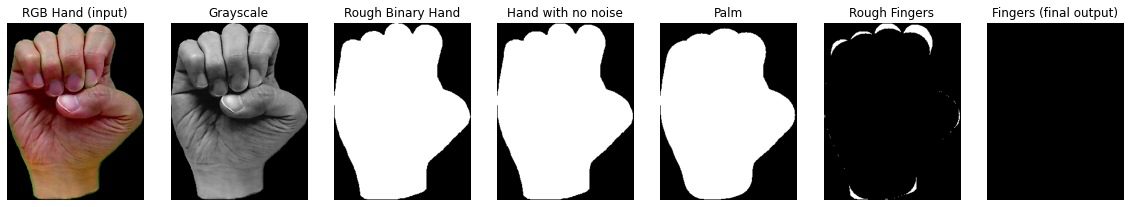

Name of image:  fingers/img (9).png
Number of Fingers:  0


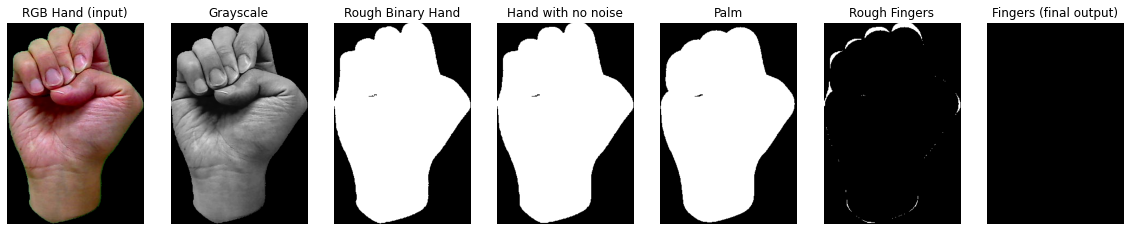

Name of image:  fingers/img (10).png
Number of Fingers:  0


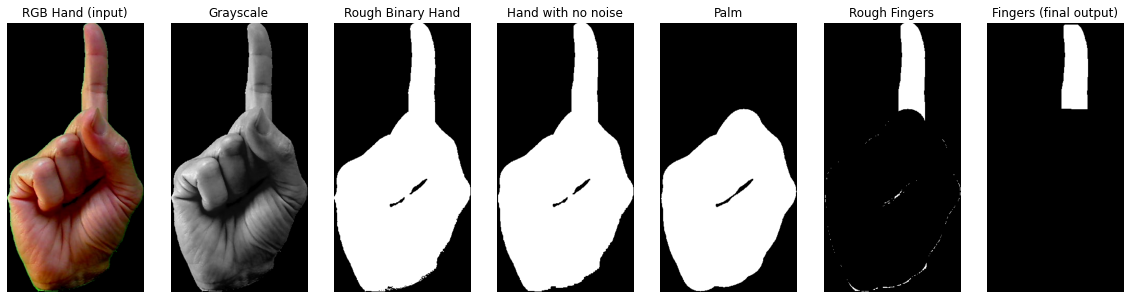

Name of image:  fingers/img (11).png
Number of Fingers:  1


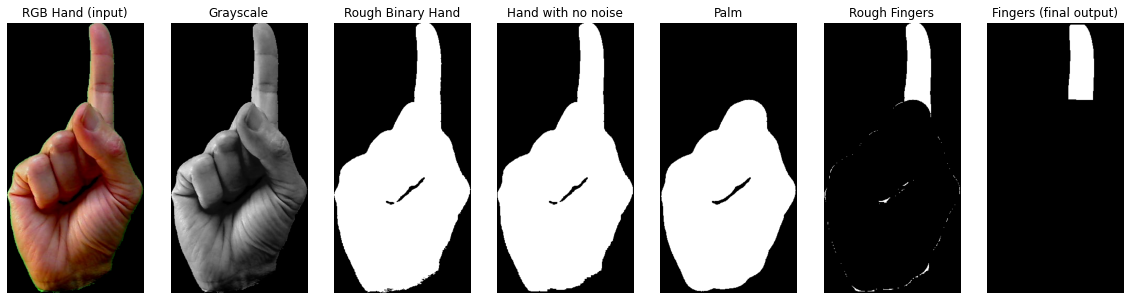

Name of image:  fingers/img (12).png
Number of Fingers:  1


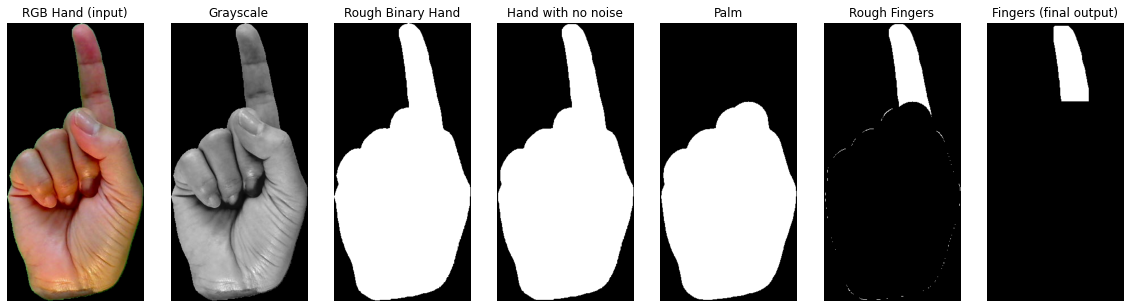

Name of image:  fingers/img (13).png
Number of Fingers:  1


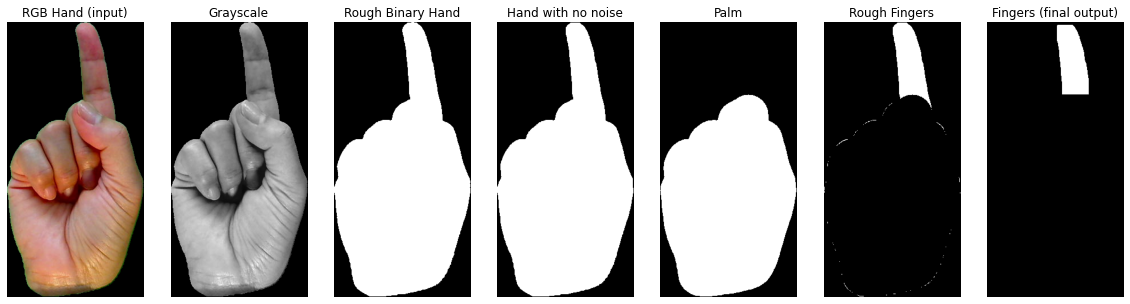

Name of image:  fingers/img (14).png
Number of Fingers:  1


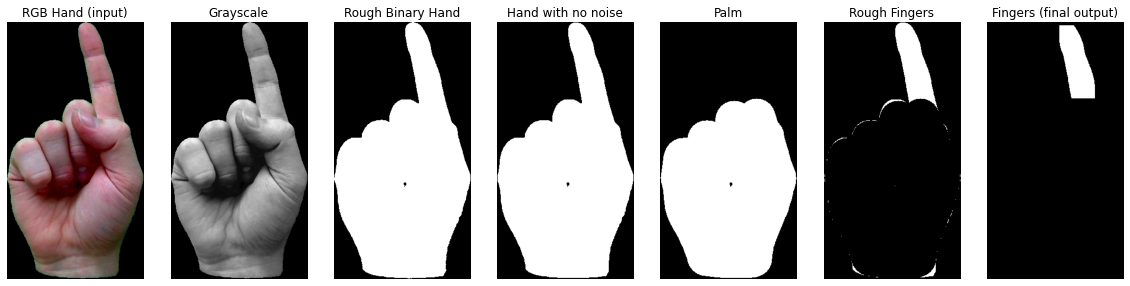

Name of image:  fingers/img (15).png
Number of Fingers:  1


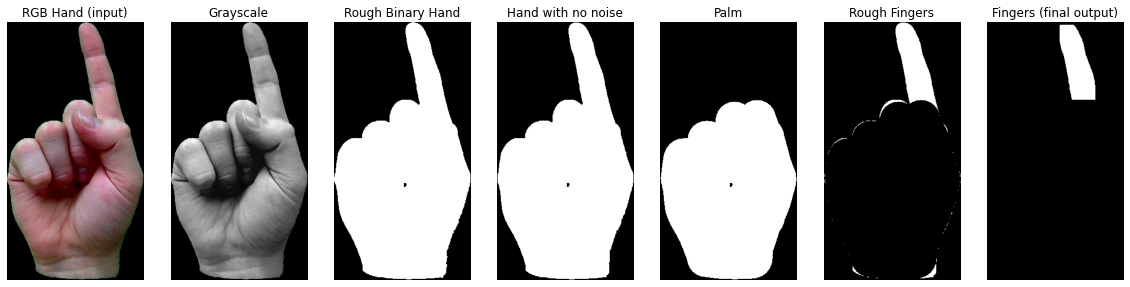

Name of image:  fingers/img (16).png
Number of Fingers:  1


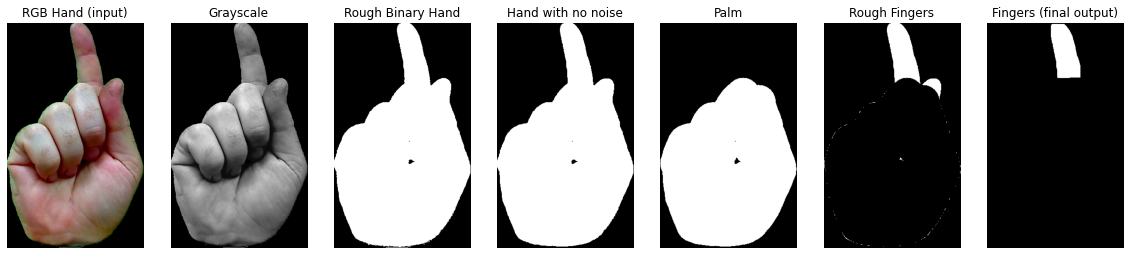

Name of image:  fingers/img (17).png
Number of Fingers:  1


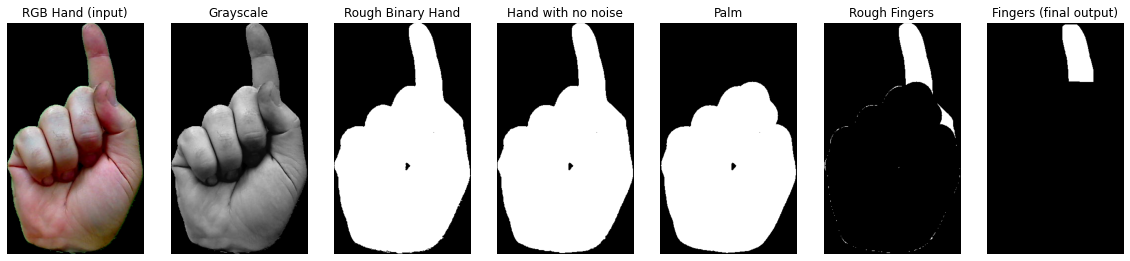

Name of image:  fingers/img (18).png
Number of Fingers:  1


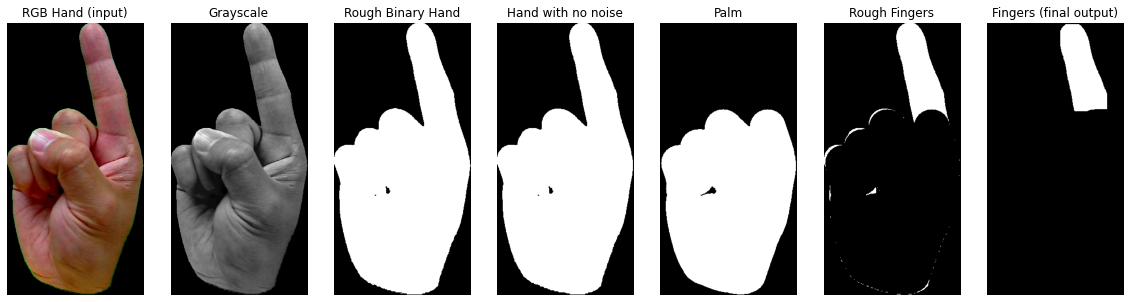

Name of image:  fingers/img (19).png
Number of Fingers:  1


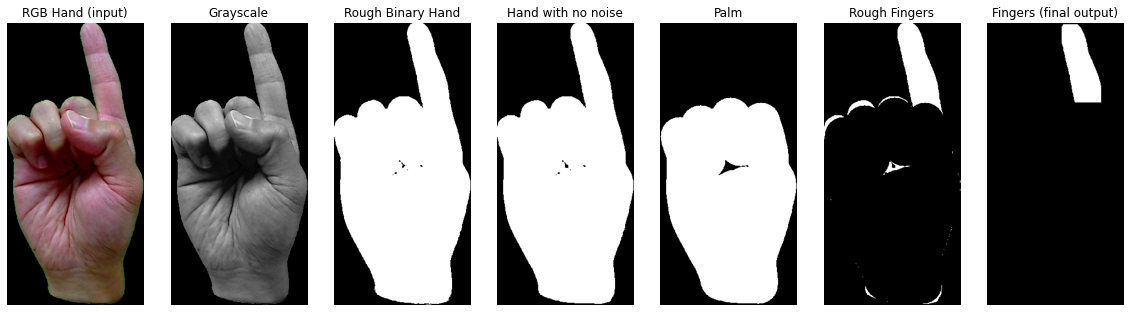

Name of image:  fingers/img (20).png
Number of Fingers:  1


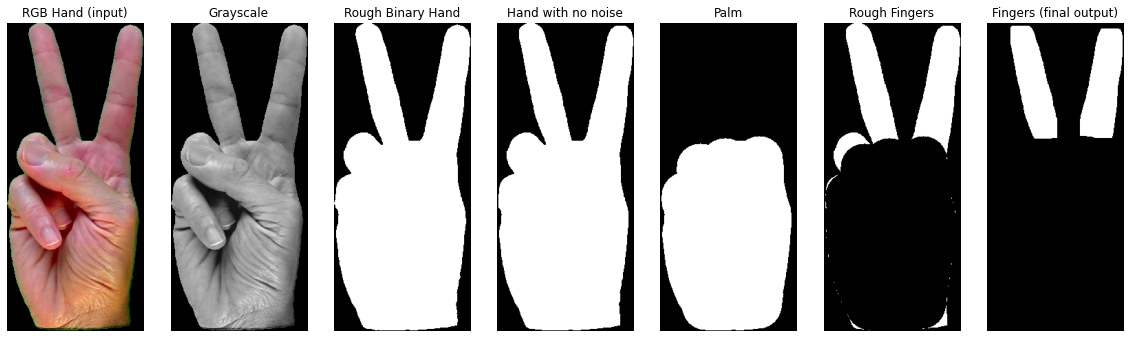

Name of image:  fingers/img (21).png
Number of Fingers:  2


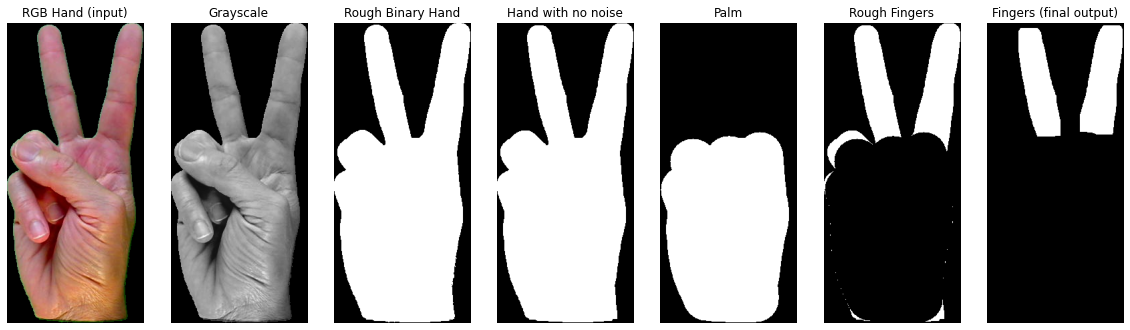

Name of image:  fingers/img (22).png
Number of Fingers:  2


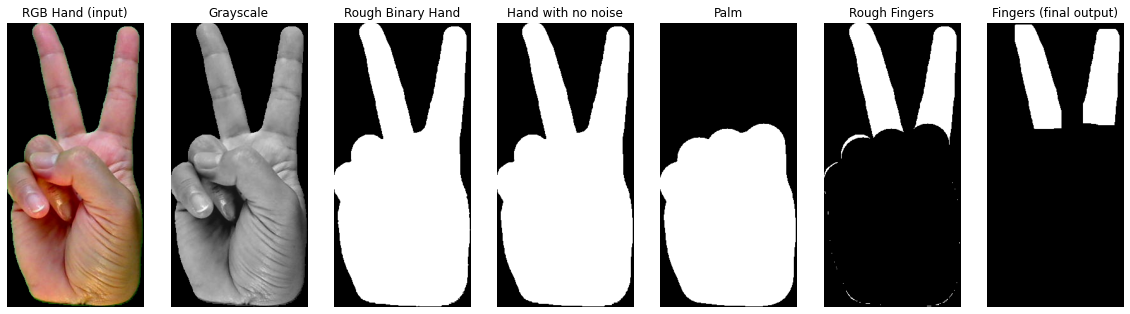

Name of image:  fingers/img (23).png
Number of Fingers:  2


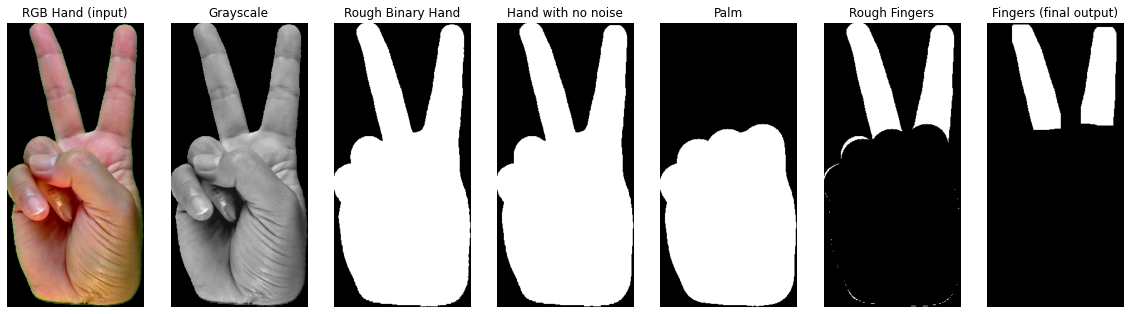

Name of image:  fingers/img (24).png
Number of Fingers:  2


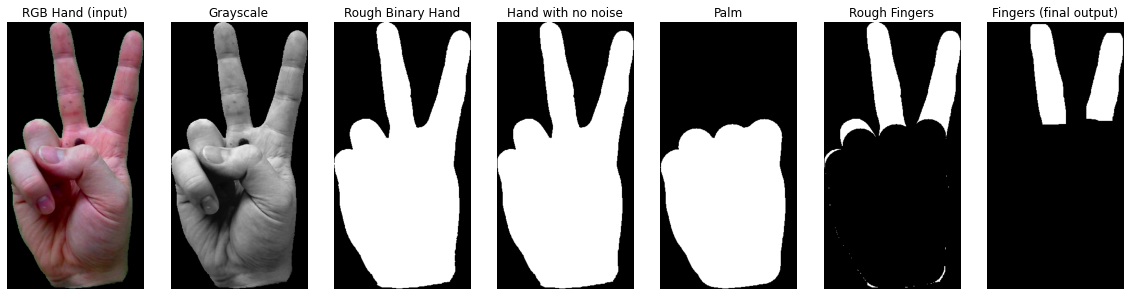

Name of image:  fingers/img (25).png
Number of Fingers:  2


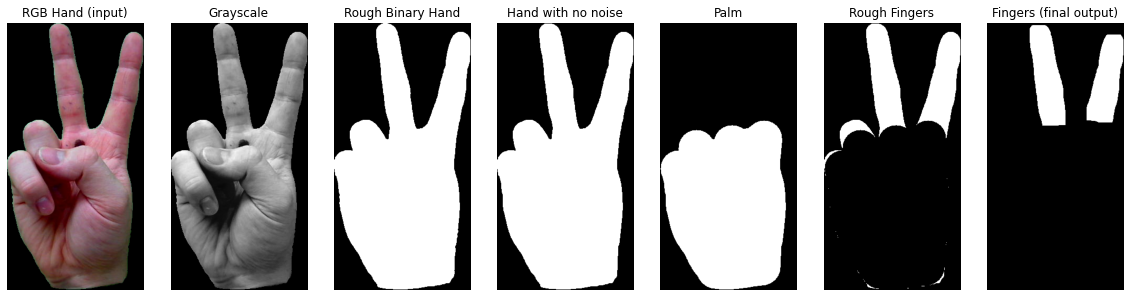

Name of image:  fingers/img (26).png
Number of Fingers:  2


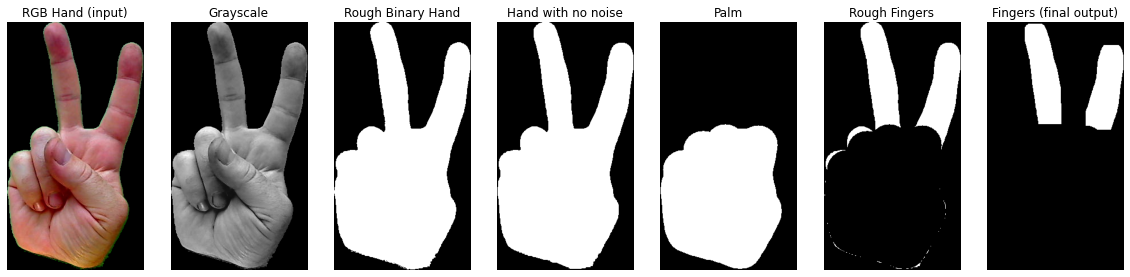

Name of image:  fingers/img (27).png
Number of Fingers:  2


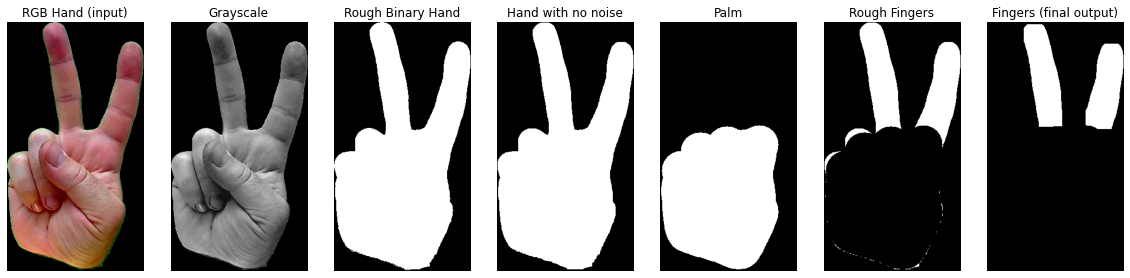

Name of image:  fingers/img (28).png
Number of Fingers:  2


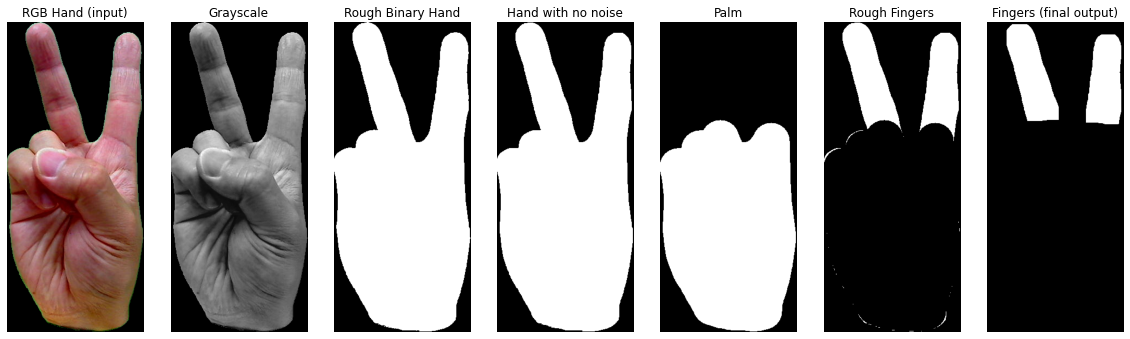

Name of image:  fingers/img (29).png
Number of Fingers:  2


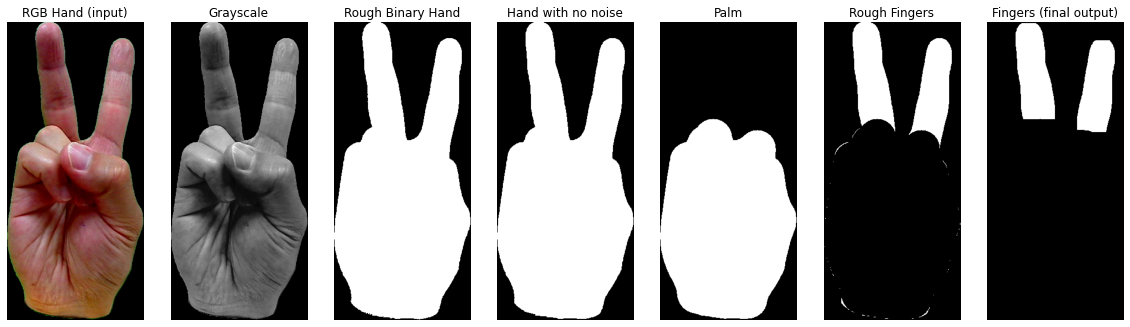

Name of image:  fingers/img (30).png
Number of Fingers:  2


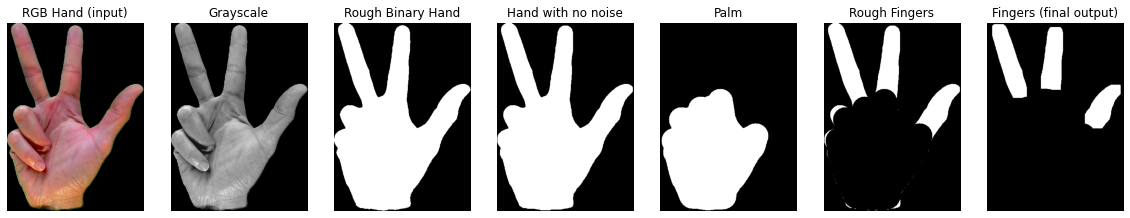

Name of image:  fingers/img (31).png
Number of Fingers:  3


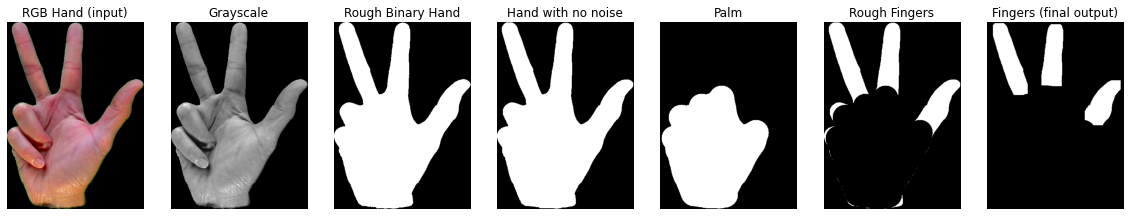

Name of image:  fingers/img (32).png
Number of Fingers:  3


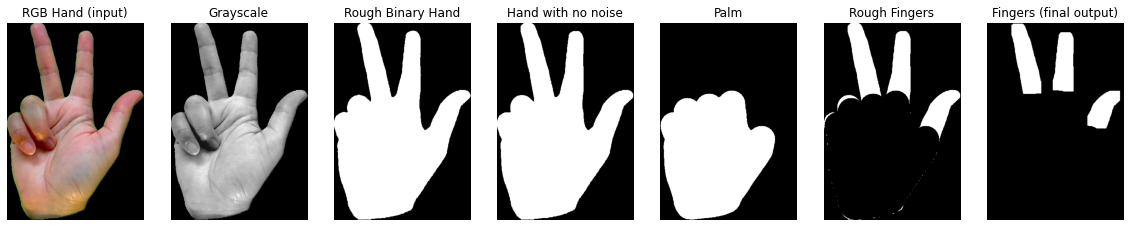

Name of image:  fingers/img (33).png
Number of Fingers:  3


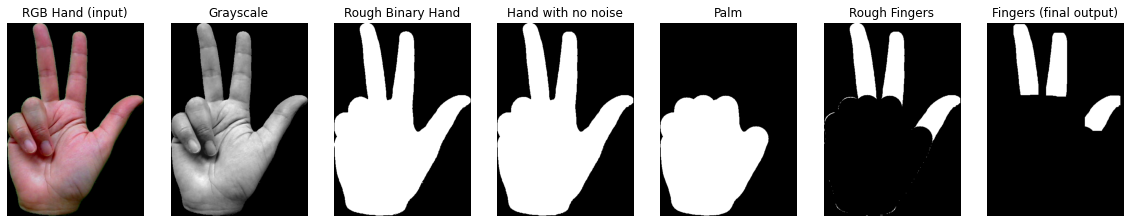

Name of image:  fingers/img (34).png
Number of Fingers:  3


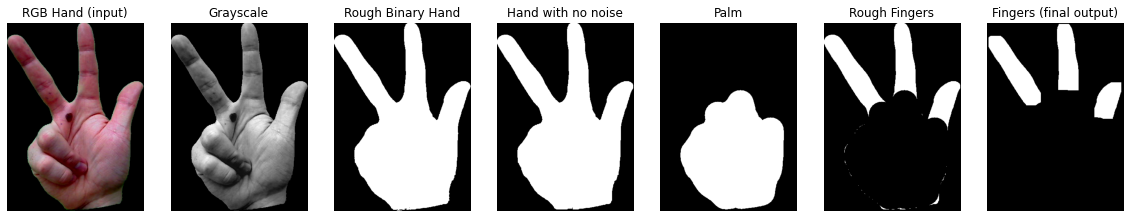

Name of image:  fingers/img (35).png
Number of Fingers:  3


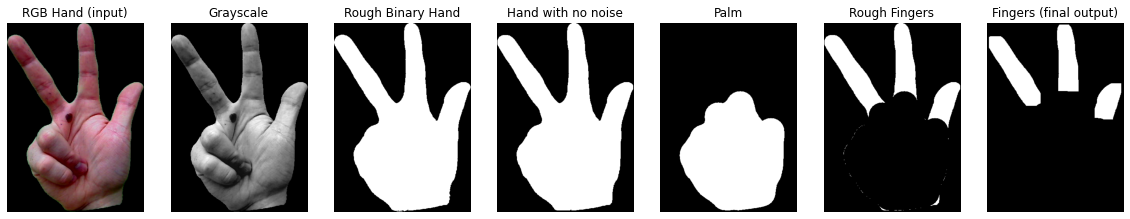

Name of image:  fingers/img (36).png
Number of Fingers:  3


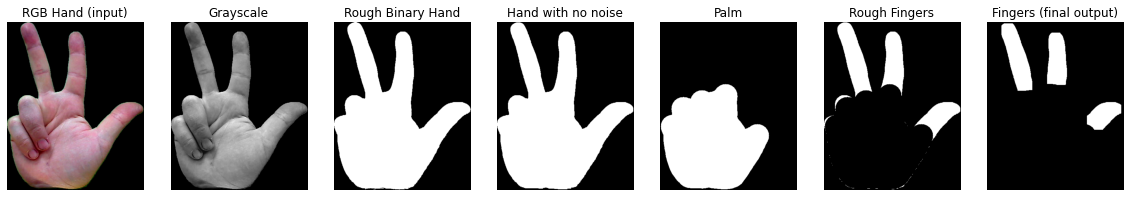

Name of image:  fingers/img (37).png
Number of Fingers:  3


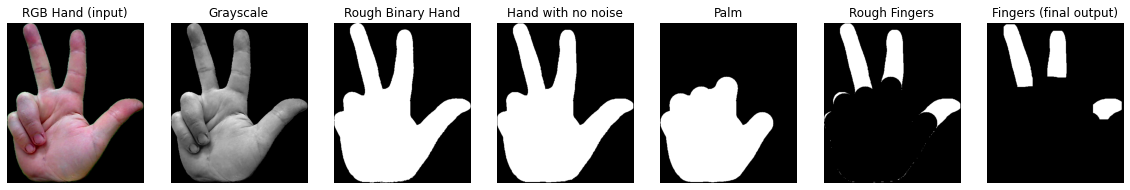

Name of image:  fingers/img (38).png
Number of Fingers:  3


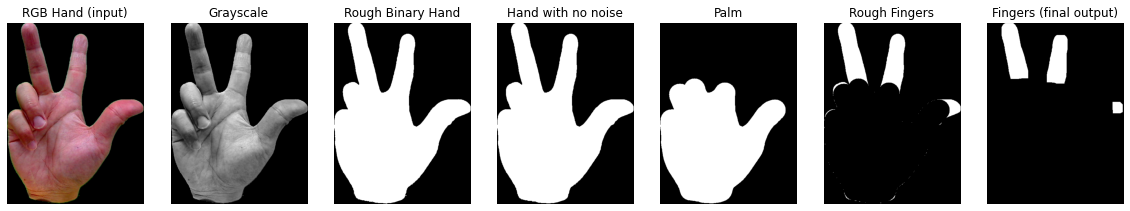

Name of image:  fingers/img (39).png
Number of Fingers:  3


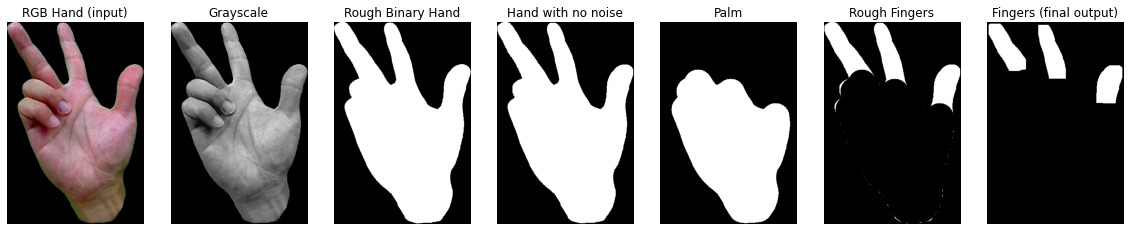

Name of image:  fingers/img (40).png
Number of Fingers:  3


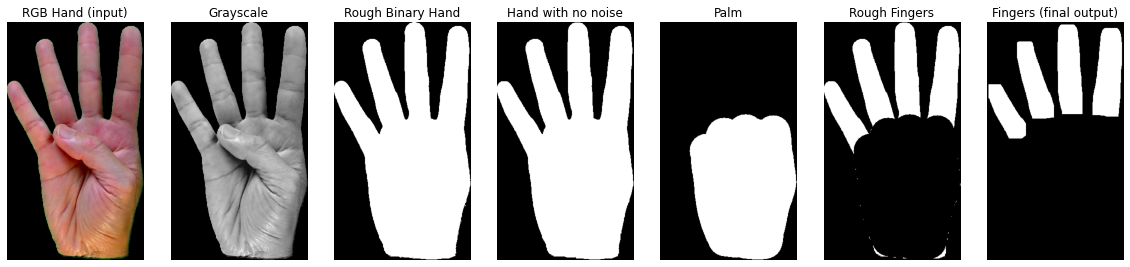

Name of image:  fingers/img (41).png
Number of Fingers:  4


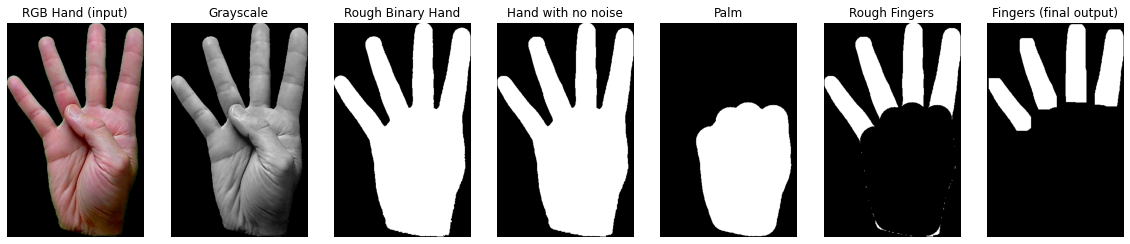

Name of image:  fingers/img (42).png
Number of Fingers:  4


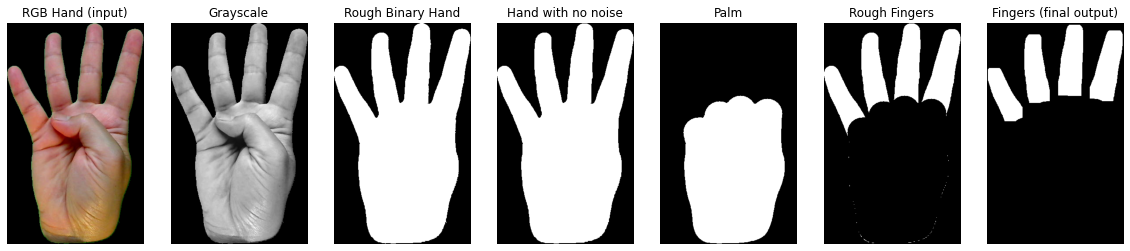

Name of image:  fingers/img (43).png
Number of Fingers:  4


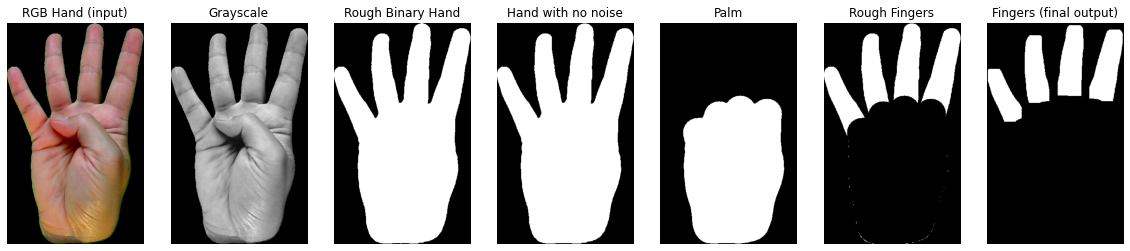

Name of image:  fingers/img (44).png
Number of Fingers:  4


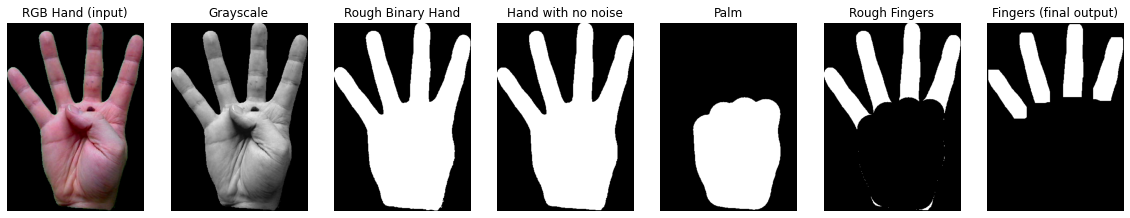

Name of image:  fingers/img (45).png
Number of Fingers:  4


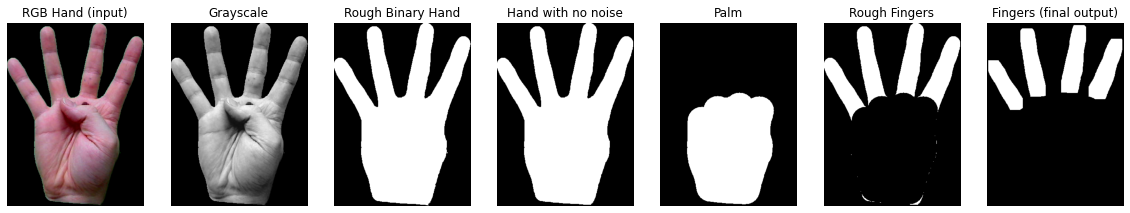

Name of image:  fingers/img (46).png
Number of Fingers:  4


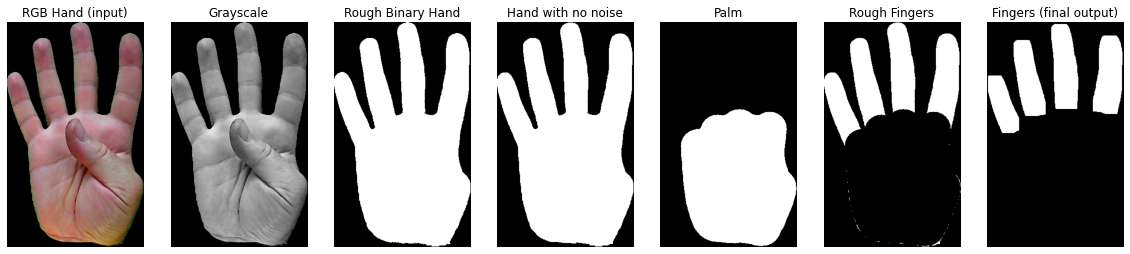

Name of image:  fingers/img (47).png
Number of Fingers:  4


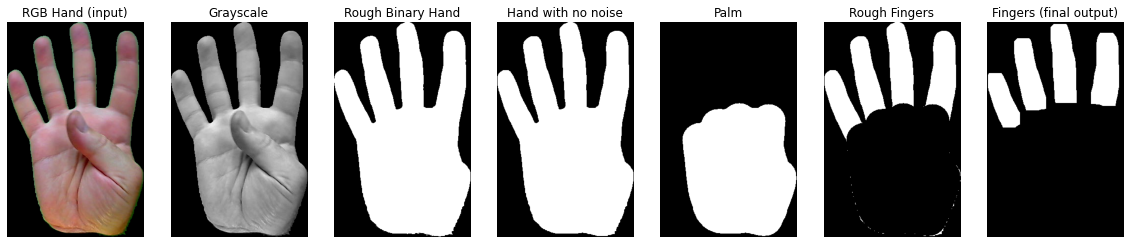

Name of image:  fingers/img (48).png
Number of Fingers:  4


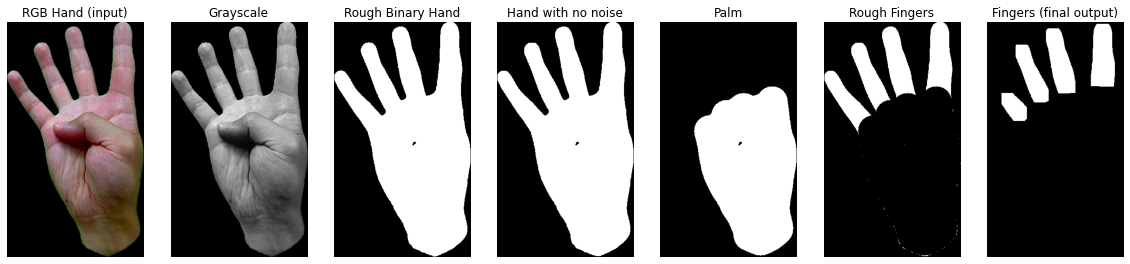

Name of image:  fingers/img (49).png
Number of Fingers:  4


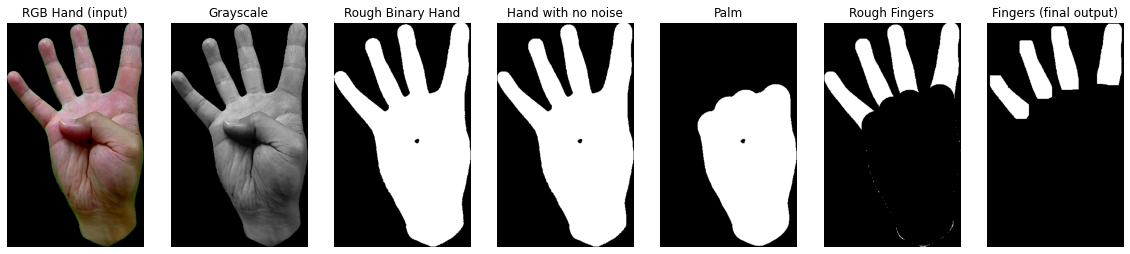

Name of image:  fingers/img (50).png
Number of Fingers:  4


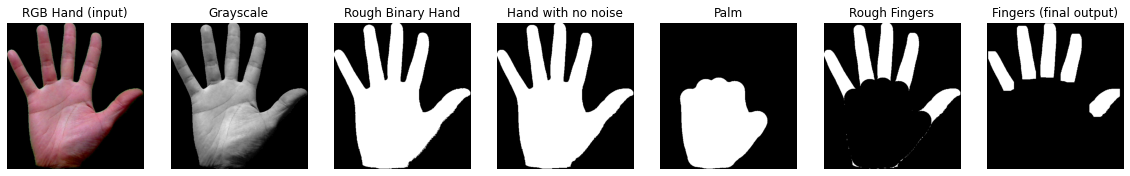

Name of image:  fingers/img (51).png
Number of Fingers:  5


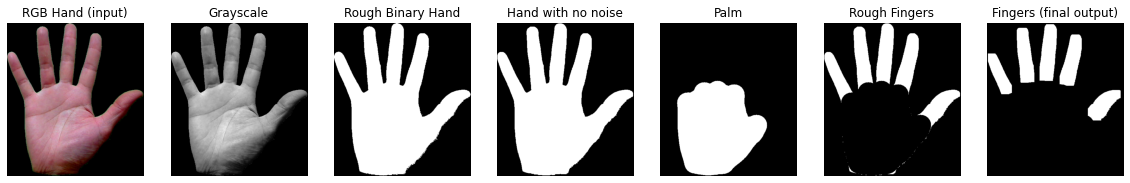

Name of image:  fingers/img (52).png
Number of Fingers:  5


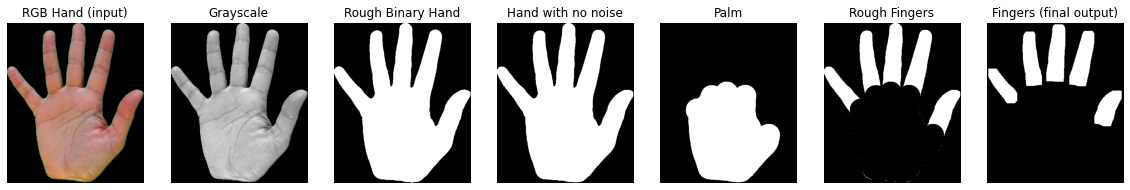

Name of image:  fingers/img (53).png
Number of Fingers:  5


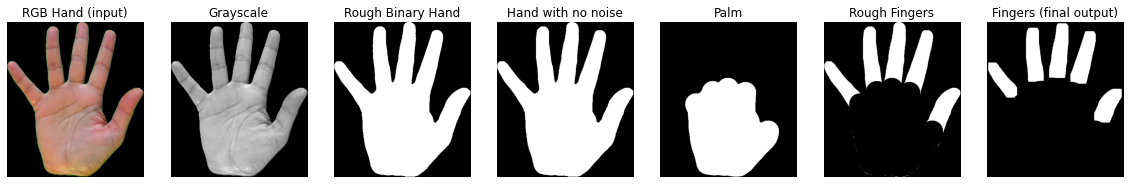

Name of image:  fingers/img (54).png
Number of Fingers:  5


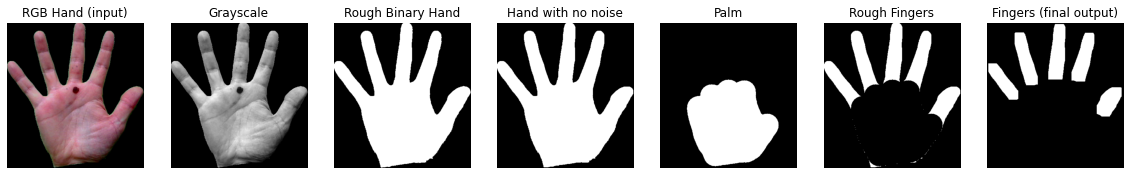

Name of image:  fingers/img (55).png
Number of Fingers:  5


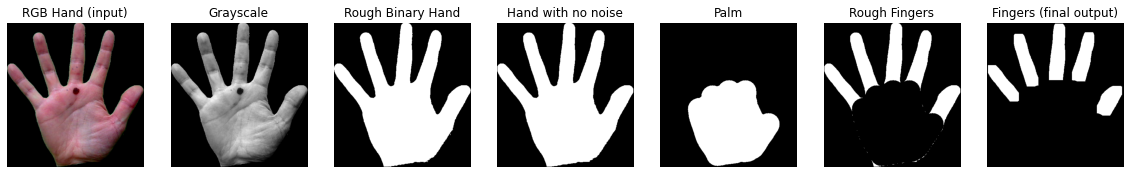

Name of image:  fingers/img (56).png
Number of Fingers:  5


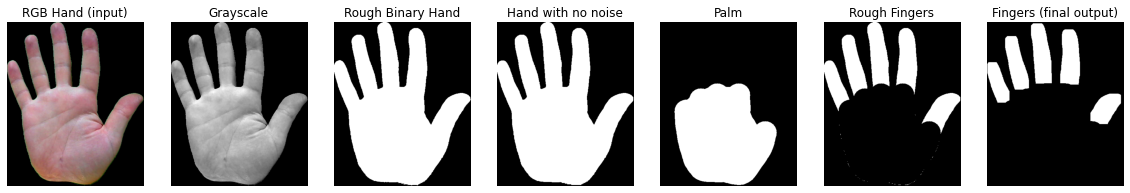

Name of image:  fingers/img (57).png
Number of Fingers:  5


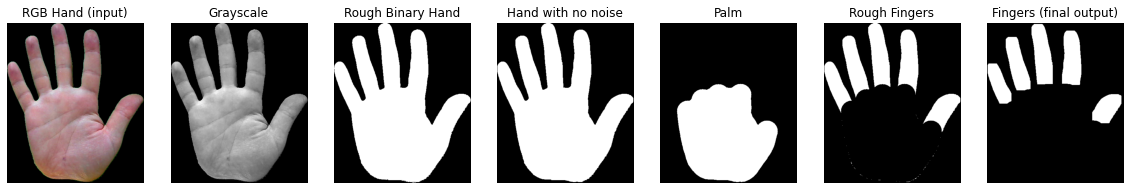

Name of image:  fingers/img (58).png
Number of Fingers:  5


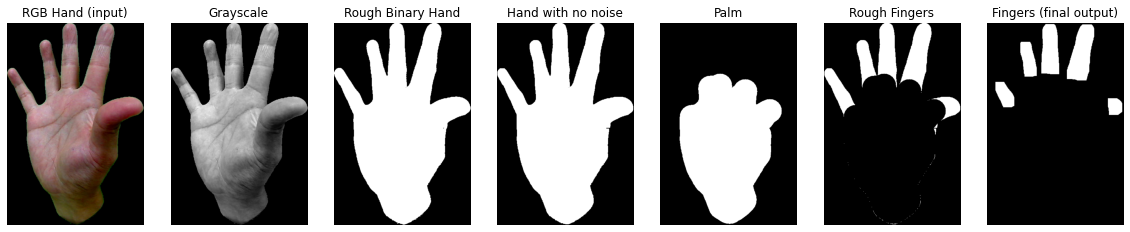

Name of image:  fingers/img (59).png
Number of Fingers:  5


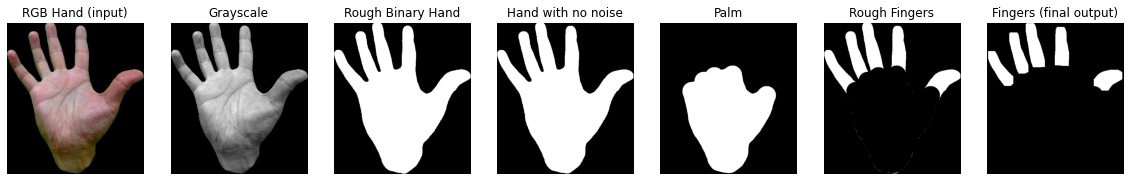

Name of image:  fingers/img (60).png
Number of Fingers:  5


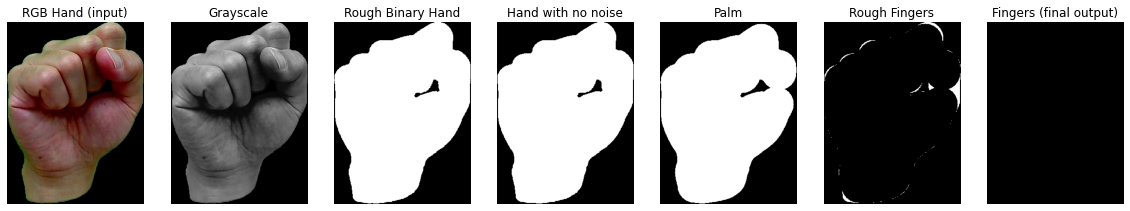

Name of image:  fingers/img (61).png
Number of Fingers:  0


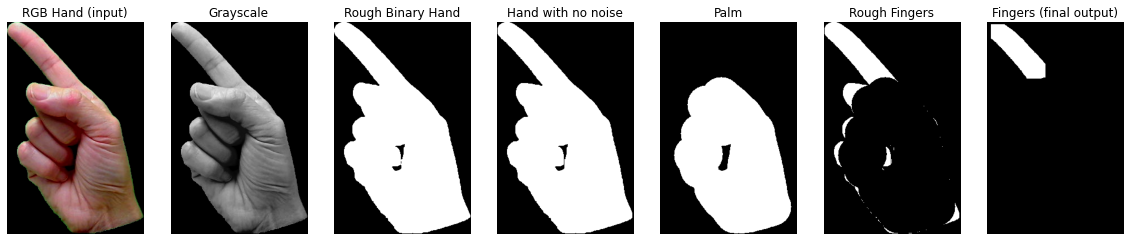

Name of image:  fingers/img (62).png
Number of Fingers:  1


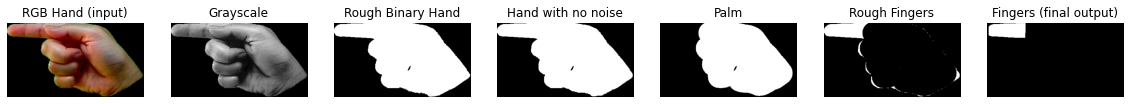

Name of image:  fingers/img (63).png
Number of Fingers:  1


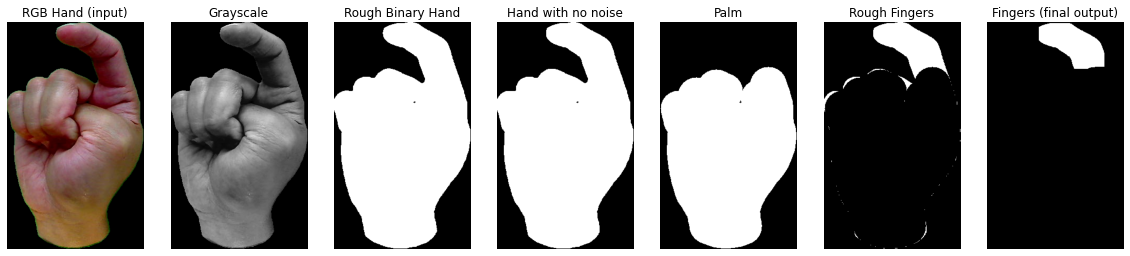

Name of image:  fingers/img (64).png
Number of Fingers:  1


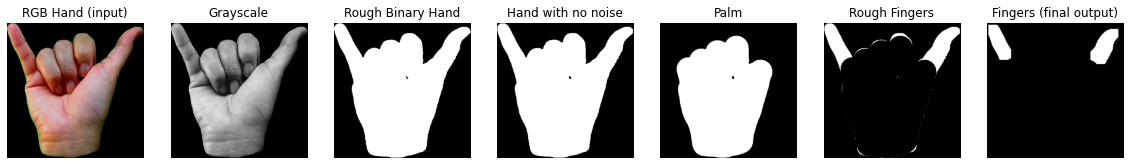

Name of image:  fingers/img (65).png
Number of Fingers:  2


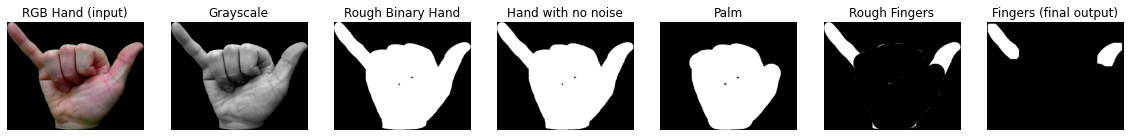

Name of image:  fingers/img (66).png
Number of Fingers:  2


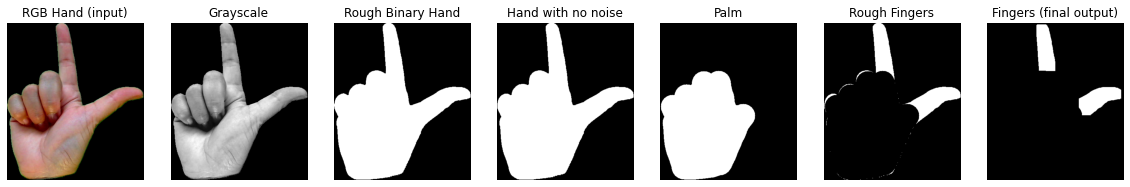

Name of image:  fingers/img (67).png
Number of Fingers:  2


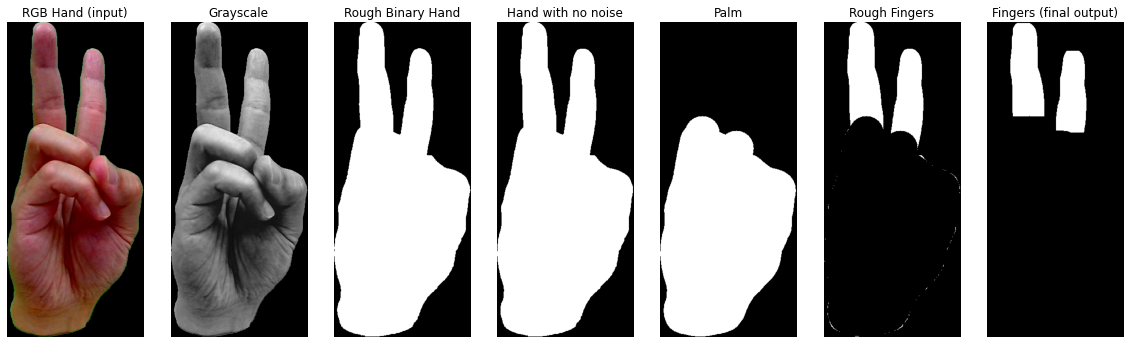

Name of image:  fingers/img (68).png
Number of Fingers:  2


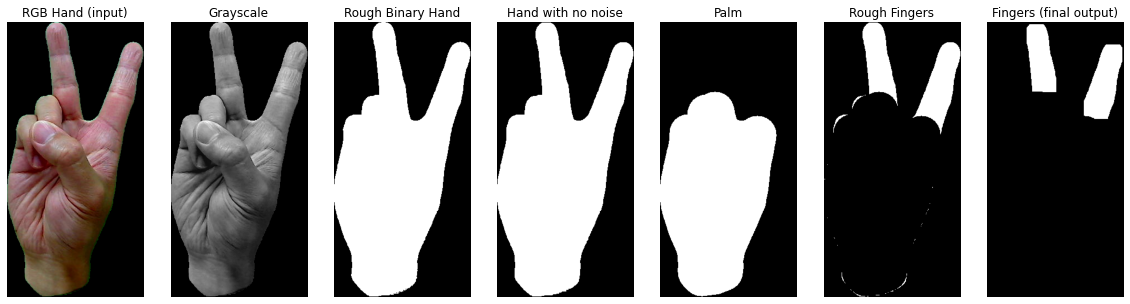

Name of image:  fingers/img (69).png
Number of Fingers:  2


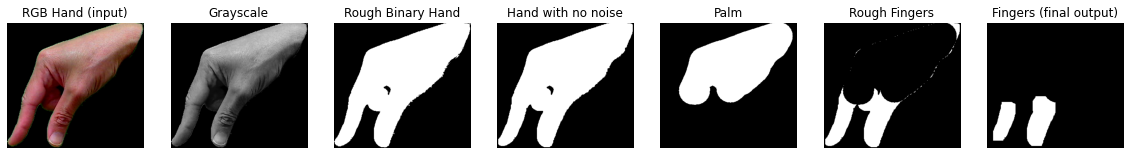

Name of image:  fingers/img (70).png
Number of Fingers:  2


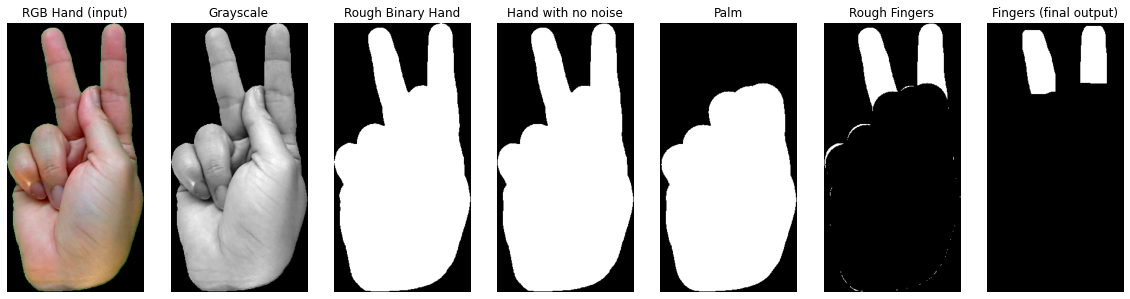

Name of image:  fingers/img (71).png
Number of Fingers:  2


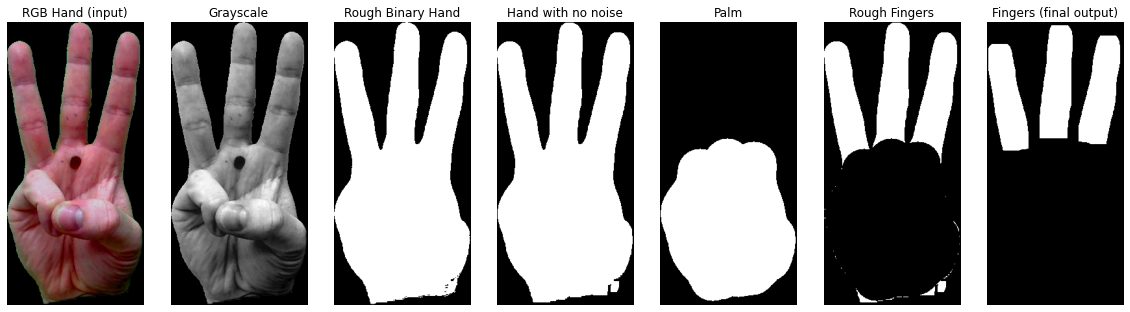

Name of image:  fingers/img (72).png
Number of Fingers:  3


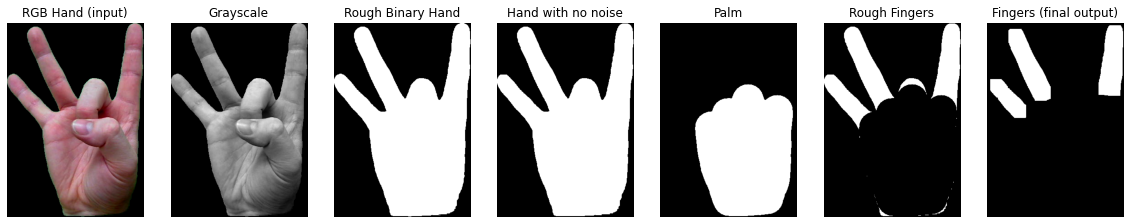

Name of image:  fingers/img (73).png
Number of Fingers:  3


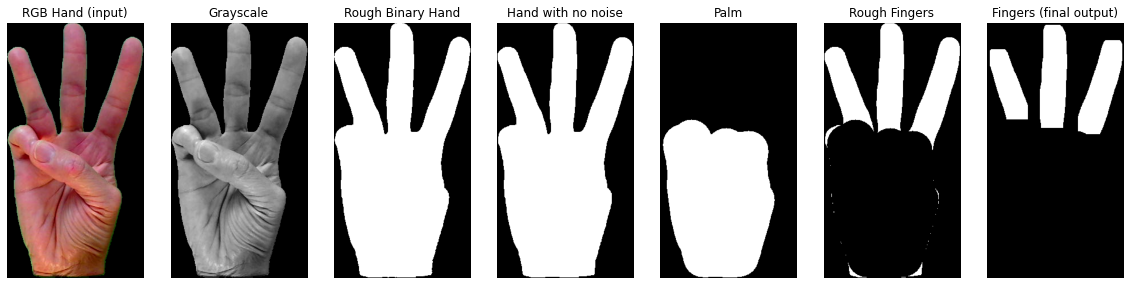

Name of image:  fingers/img (74).png
Number of Fingers:  3


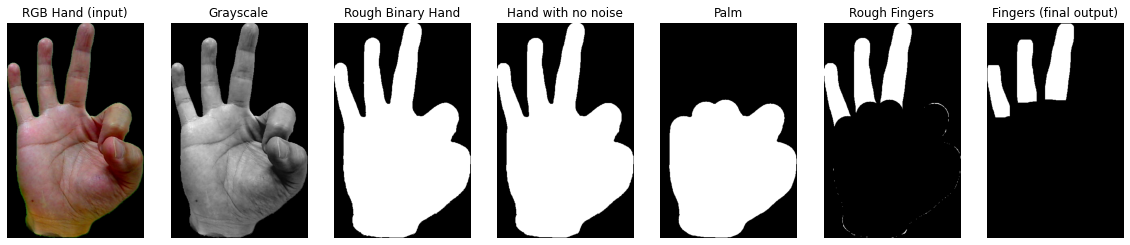

Name of image:  fingers/img (75).png
Number of Fingers:  3


In [2]:
#loop through every image
for i in range(1,76):
    name="fingers/img ("+str(i)+")"+".png" #path of fingers
    imgColour = sk.io.imread(name) #read in RGB image
    imgGray=imgColour.copy()

    imgGray = rgb2gray(imgGray) #convert image from RGB to gray
    imgBinaryRough=imgGray.copy()

    #convert image to binary image
    for i in range(imgGray.shape[0]):#don't need to use a threshold such as otsu seen as the background is black (0)
        for j in range(imgGray.shape[1]):
            if(imgGray[i][j]>0):
                imgBinaryRough[i][j]=1
            elif(imgGray[i][j]==0):
                imgBinaryRough[i][j]=0

    fig,axes = plt.subplots(nrows=1, ncols=7, figsize=(20,18), sharex=True, sharey=True)
    ax=axes.ravel()
    
    ax[0].imshow(imgColour) #original RGB hand image
    ax[0].set_title("RGB Hand (input)")
    
    ax[1].imshow(imgGray,cmap=plt.cm.gray) #original RGB hand image
    ax[1].set_title("Grayscale")
        
    ax[2].imshow(imgBinaryRough,cmap=plt.cm.gray) #binary hand image     
    ax[2].set_title("Rough Binary Hand")
    
    SE1=morphology.square(10)
    imgBinary=morphology.binary_opening(imgBinaryRough,SE1).astype(int) #get rid of background noise

    ax[3].imshow(imgBinary,cmap=plt.cm.gray) #hand without background noise
    ax[3].set_title("Hand with no noise")
    
    SE2=morphology.disk(34)
    imgPalm=morphology.binary_opening(imgBinary,SE2).astype(int) #removes fingers from palm
    ax[4].imshow(imgPalm,cmap=plt.cm.gray) #hand image just as a palm
    ax[4].set_title("Palm")
    
    imgFingersRough=imgBinary-imgPalm # get rid of the palm section of the hand
    ax[5].imshow(imgFingersRough,cmap=plt.cm.gray) #full hand - palm so only fingers
    ax[5].set_title("Rough Fingers")

    SE3=morphology.square(25)
    imgFingers=morphology.binary_opening(imgFingersRough,SE3) #remove any small boarder forground pixels remaining from full hand - palm image
    ax[6].imshow(imgFingers,cmap=plt.cm.gray) #just fingers
    ax[6].set_title("Fingers (final output)")
    
    #remove axis from all output images
    for a in ax:
        a.axis('off')
    plt.show()

    num=measure.label(imgFingers) #labels the connected components
    connectedComponents = np.unique(num) #find the connected component number
    numFingers = np.count_nonzero(connectedComponents) #count the connected component number excluding 0
    
    print("Name of image: ",name)
    print("Number of Fingers: ",numFingers)